In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
food_loss_data = "Resources/FAO_Food_Loss.csv"
gdp_values = "Resources/GDP_data.csv"

In [3]:
food_loss_df = pd.read_csv(food_loss_data)
gdp_df = pd.read_csv(gdp_values)
food_loss_df = pd.DataFrame(food_loss_df)
food_loss_df.head()

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,...,notes,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,104,Myanmar,NaN,23161.02,"Rice, milled",2015,1.78,1.78%,26.12kgs,Storage,...,Reference has been generated automatically,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,104,Myanmar,NaN,23161.02,"Rice, milled",2015,11.77,11.77%,88.18kgs,Storage,...,Reference has been generated automatically,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,104,Myanmar,NaN,23161.02,"Rice, milled",2015,5.88,5.88%,44.09kgs,Storage,...,Reference has been generated automatically,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,104,Myanmar,NaN,23161.02,"Rice, milled",2015,3.57,3.57%,52.24kgs,Storage,...,Reference has been generated automatically,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,104,Myanmar,NaN,23161.02,"Rice, milled",2015,17.65,17.65%,132.27kgs,Storage,...,Reference has been generated automatically,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# filter out the empty columns
food_loss_clean = food_loss_df[["m49_code", "country", "region", "commodity", "year", "loss_percentage", "loss_percentage_original", "loss_quantity", "activity1", "activity2", "food_supply_stage", "treatment", "cause_of_loss"]]
food_loss_clean.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
0,104,Myanmar,NaN,"Rice, milled",2015,1.78,1.78%,26.12kgs,Storage,NaN,Storage,"30 days storage, with trapping",Rodents
1,104,Myanmar,NaN,"Rice, milled",2015,11.77,11.77%,88.18kgs,Storage,NaN,Storage,"60 days storage, no trapping",Rodents
2,104,Myanmar,NaN,"Rice, milled",2015,5.88,5.88%,44.09kgs,Storage,NaN,Storage,"30 days storage, no trapping",Rodents
3,104,Myanmar,NaN,"Rice, milled",2015,3.57,3.57%,52.24kgs,Storage,NaN,Storage,"60 days storage, with trapping",Rodents
4,104,Myanmar,NaN,"Rice, milled",2015,17.65,17.65%,132.27kgs,Storage,NaN,Storage,"90 days storage, no trapping",Rodents


In [5]:
# Check number of rows per country
count_per_country = food_loss_clean.groupby("country")
count_per_country.count()

,m49_code,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
country,,,,,,,,,,,,
Africa,1,0,1,1,1,1,0,0,0,1,0,0
Algeria,2,0,2,2,2,2,0,0,0,2,0,0
Angola,726,0,726,726,726,726,0,726,220,616,0,0
Argentina,14,0,14,14,14,14,13,13,0,14,13,0
Armenia,38,0,38,38,38,38,0,20,8,38,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,16,0,16,16,16,16,8,11,3,15,11,0
Western Africa,4,0,4,4,4,4,0,4,0,4,0,0
Western Asia,5,0,5,5,5,5,0,5,2,5,0,0


In [6]:
# figure out which countries have the most data
count_per_country_sorted = count_per_country.count().sort_values(by="m49_code", ascending=False)
count_per_country_sorted.head(20)

,m49_code,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
country,,,,,,,,,,,,
United States of America,3094,0,3094,3094,3094,3094,13,191,96,3094,90,6
India,1354,140,1354,1354,1354,1354,111,1062,133,1351,46,136
Ethiopia,1064,27,1064,1064,1064,1064,8,1002,290,933,83,28
Kenya,1054,77,1054,1054,1054,1054,11,998,269,917,146,108
Uganda,866,31,866,866,866,866,7,851,279,734,8,18
Ghana,817,99,817,817,817,817,6,724,332,729,100,103
Malawi,803,14,803,803,803,803,9,747,223,693,29,18
Senegal,799,23,799,799,799,799,1,748,220,689,0,40
Zambia,772,5,772,772,772,772,1,762,220,684,4,8


In [7]:
# create df with our 15 African countries of choice
countries_list = ["Ethiopia", "Kenya", "Uganda", "Malawi", "Senegal", "Zambia", "Burkina Faso", "Angola", "Benin", "Mali", "United Republic of Tanzania", "Mozambique", "Rwanda", "Nigeria"]
african_data = food_loss_clean[food_loss_clean['country'].isin(countries_list)]
african_data.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
2245,204,Benin,NaN,Rice,2022,4.70,4.70%,NaN,Threshing,NaN,Farm,Manual threshing,NaN
2246,204,Benin,NaN,Rice,2022,3.42,3.42%,NaN,Storage,NaN,Storage,Paddy and milled rice,NaN
2247,204,Benin,NaN,Rice,2022,10.97,10.97%,NaN,Harvesting,NaN,Harvest,Manual harvesting,NaN
2248,204,Benin,NaN,Rice,2022,2.80,2.80%,NaN,Harvesting,NaN,Harvest,Harvesting with manual per panicle,NaN
2249,204,Benin,NaN,Rice,2022,1.09,1.09%,NaN,Winnowing,NaN,Farm,NaN,NaN


In [8]:
# rename/ re-characterize some rows

african_data.loc[african_data["activity1"] == "Storage", "food_supply_stage"] = "Storage"
african_data.loc[african_data["activity1"] == "Transportation", "food_supply_stage"] = "Transportation"
african_data.loc[african_data["activity1"] == "Shelling", "food_supply_stage"] = "Harvest"
african_data.loc[african_data["food_supply_stage"] == "Transport", "food_supply_stage"] = "Transportation"
african_data.loc[african_data["activity1"] == "Drying", "food_supply_stage"] = "Farm"
african_data.loc[african_data["food_supply_stage"] == "Collector", "food_supply_stage"] = "Harvest"
african_data.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
2245,204,Benin,NaN,Rice,2022,4.70,4.70%,NaN,Threshing,NaN,Farm,Manual threshing,NaN
2246,204,Benin,NaN,Rice,2022,3.42,3.42%,NaN,Storage,NaN,Storage,Paddy and milled rice,NaN
2247,204,Benin,NaN,Rice,2022,10.97,10.97%,NaN,Harvesting,NaN,Harvest,Manual harvesting,NaN
2248,204,Benin,NaN,Rice,2022,2.80,2.80%,NaN,Harvesting,NaN,Harvest,Harvesting with manual per panicle,NaN
2249,204,Benin,NaN,Rice,2022,1.09,1.09%,NaN,Winnowing,NaN,Farm,NaN,NaN


In [9]:
# isolate blank rows for food_supply_stage and activity1
blank_rows = african_data[african_data['food_supply_stage'].isnull() | (african_data['food_supply_stage'] == '') & (african_data['activity1'].isnull())]
blank_rows.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
2903,204,Benin,NaN,Maize (corn),2000,17.80,2.1-33.5,NaN,NaN,NaN,NaN,NaN,NaN
9729,404,Kenya,NaN,Maize (corn),2012,15.15,9.7-20.6,NaN,NaN,NaN,NaN,NaN,NaN
10039,404,Kenya,NaN,Maize (corn),2006,5.75,3.9-7.6,NaN,NaN,NaN,NaN,NaN,NaN
10040,404,Kenya,NaN,Maize (corn),2006,24.20,19.3-29.1,NaN,NaN,NaN,NaN,NaN,NaN
10117,404,Kenya,NaN,Maize (corn),2004,14.25,13.5-15,NaN,NaN,NaN,NaN,NaN,Insects; Maize Stem Borer


In [10]:
# display african_data without blank rows for food_supply_stage
african_data = african_data.drop(blank_rows.index)
african_data.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
2245,204,Benin,NaN,Rice,2022,4.70,4.70%,NaN,Threshing,NaN,Farm,Manual threshing,NaN
2246,204,Benin,NaN,Rice,2022,3.42,3.42%,NaN,Storage,NaN,Storage,Paddy and milled rice,NaN
2247,204,Benin,NaN,Rice,2022,10.97,10.97%,NaN,Harvesting,NaN,Harvest,Manual harvesting,NaN
2248,204,Benin,NaN,Rice,2022,2.80,2.80%,NaN,Harvesting,NaN,Harvest,Harvesting with manual per panicle,NaN
2249,204,Benin,NaN,Rice,2022,1.09,1.09%,NaN,Winnowing,NaN,Farm,NaN,NaN


In [11]:
# find average of loss percentage for each supply stage and rank the results

amount_of_waste = african_data.groupby("food_supply_stage")["loss_percentage"].mean()
amount_of_waste_sorted = amount_of_waste.sort_values(ascending=False)
amount_of_waste_sorted = pd.DataFrame(amount_of_waste_sorted)
amount_of_waste_sorted.head()

,loss_percentage
food_supply_stage,
Export,25.750000
Retail,18.872182
Post-harvest,18.084444
Wholesale,15.080364
Whole supply chain,13.768627


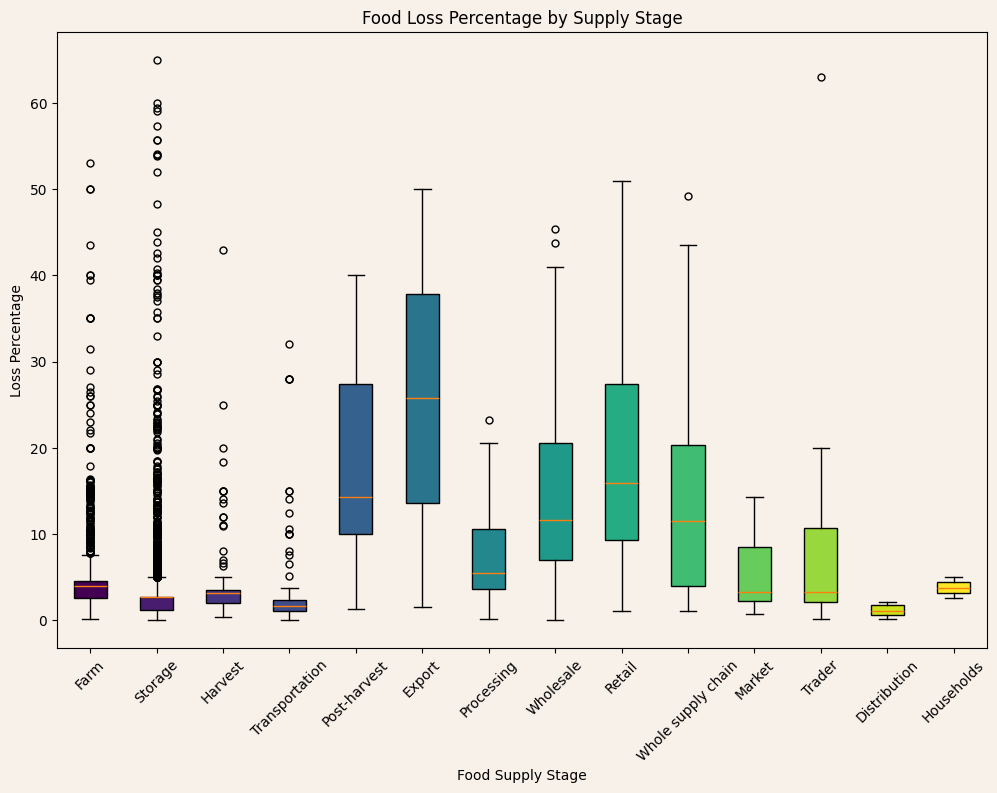

In [12]:
# Create a box plot for food loss percentage by supply stage

plt.figure(figsize=(12, 8))
flierprops = dict(marker='o', markersize=5, linestyle='none')
box_data = [african_data[african_data['food_supply_stage'] == stage]['loss_percentage'] for stage in african_data['food_supply_stage'].unique()]
boxplot = plt.boxplot(box_data, tick_labels=african_data['food_supply_stage'].unique(), patch_artist=True, showfliers=True, flierprops = flierprops)
# Color code each boxplot with a different color
colors = plt.cm.viridis(np.linspace(0, 1, len(box_data)))  # Generate a list of colors
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
# Customize the plot
plt.title('Food Loss Percentage by Supply Stage')
plt.xlabel('Food Supply Stage')
plt.ylabel('Loss Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Change the background color
plt.gca().set_facecolor('#F8F1E9')  # Set the background color of the plot area
plt.gcf().set_facecolor('#F8F1E9')  # Set the background color of the fig

# Save the figure
plt.savefig("Visualizations/africa_box_plot.png")

plt.show()

In [13]:
commodity_wasted = african_data.groupby("commodity")["loss_percentage"].mean()
commodity_wasted_sorted = commodity_wasted.sort_values(ascending=False)

In [14]:
waste_by_year = african_data.groupby("year")["loss_percentage"].mean()
waste_by_year_sorted = waste_by_year.sort_values(ascending=False)

In [15]:
# create a simple dataframe for waste by year
waste_by_year = pd.DataFrame(waste_by_year)
waste_by_year.reset_index(inplace=True)
waste_by_year.head()

,year,loss_percentage
0,1968,5.4000
1,1969,14.2500
2,1970,18.5000
3,1973,14.2500
4,1974,18.8525


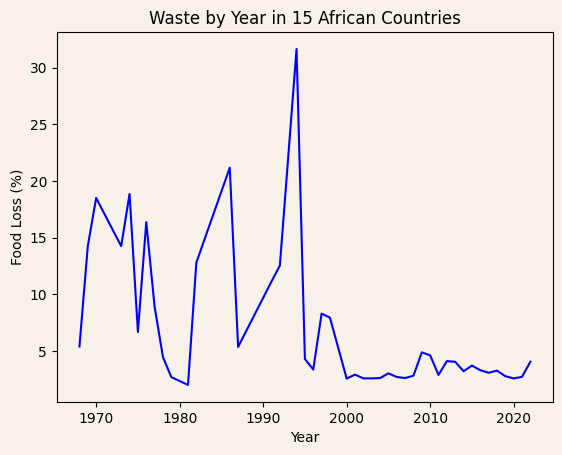

In [16]:
x_axis = waste_by_year["year"]
y_axis = waste_by_year["loss_percentage"]
plt.plot(x_axis, y_axis, color = 'b')
plt.title("Waste by Year in 15 African Countries")
plt.xlabel("Year")
plt.ylabel("Food Loss (%)")

# Change the background color
plt.gca().set_facecolor('#F8F1E9')  # Set the background color of the plot area
plt.gcf().set_facecolor('#F8F1E9')  # Set the background color of the fig

# Save the figure
plt.savefig("Visualizations/africa_over_time.png")

plt.show()

In [17]:
# add simplified stages column to the african_data df
african_data["Simplified Supply Stage"] = ''
african_data.loc[african_data["food_supply_stage"] == "Farm", "Simplified Supply Stage"] = "Farm Stage"
african_data.loc[african_data["food_supply_stage"] == "Pre-harvest", "Simplified Supply Stage"] = "Farm Stage"
african_data.loc[african_data["food_supply_stage"] == "Harvest", "Simplified Supply Stage"] = "Farm Stage"
african_data.loc[african_data["food_supply_stage"] == "Post-harvest", "Simplified Supply Stage"] = "Farm Stage"
african_data.loc[african_data["food_supply_stage"] == "Storage", "Simplified Supply Stage"] = "Storage Stage"
african_data.loc[african_data["food_supply_stage"] == "Packing", "Simplified Supply Stage"] = "Storage Stage"
african_data.loc[african_data["food_supply_stage"] == "Stacking", "Simplified Supply Stage"] = "Storage Stage"
african_data.loc[african_data["food_supply_stage"] == "Transportation", "Simplified Supply Stage"] = "Transport Stage"
african_data.loc[african_data["food_supply_stage"] == "Distribution", "Simplified Supply Stage"] = "Transport Stage"
african_data.loc[african_data["food_supply_stage"] == "Export", "Simplified Supply Stage"] = "Export Stage"
african_data.loc[african_data["food_supply_stage"] == "Trader", "Simplified Supply Stage"] = "Export Stage"
african_data.loc[african_data["food_supply_stage"] == "Wholesale", "Simplified Supply Stage"] = "Wholesale Stage"
african_data.loc[african_data["food_supply_stage"] == "Market", "Simplified Supply Stage"] = "Wholesale Stage"
african_data.loc[african_data["food_supply_stage"] == "Processing", "Simplified Supply Stage"] = "Wholesale Stage"
african_data.loc[african_data["food_supply_stage"] == "Retail", "Simplified Supply Stage"] = "Retail Stage"
african_data.loc[african_data["food_supply_stage"] == "Food Services", "Simplified Supply Stage"] = "Retail Stage"
african_data.loc[african_data["food_supply_stage"] == "Households", "Simplified Supply Stage"] = "Household Stage"
african_data.loc[african_data["food_supply_stage"] == "Whole supply chain", "Simplified Supply Stage"] = "Whole Supply Chain"

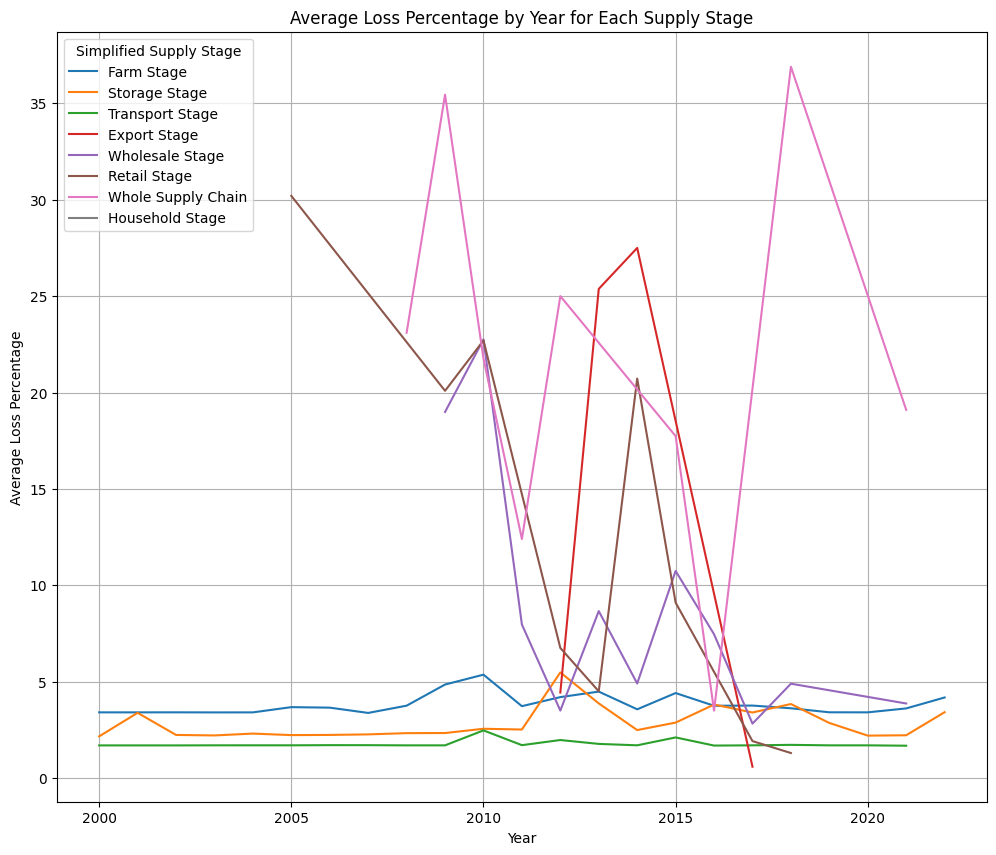

In [18]:
# create line plots over time but split them up by supply stage
african_data = african_data[african_data['year'] >= 2000]

#Group by year and Simplified Supply Stage, then calculate the mean of loss_percentage
grouped_df = african_data.groupby(["year", "Simplified Supply Stage"])["loss_percentage"].mean().reset_index()

# Get the unique stages
stages = african_data["Simplified Supply Stage"].unique()

# Plotting
plt.figure(figsize=(12, 10))

# Loop through each stage and plot
for stage in stages:
    stage_data = grouped_df[grouped_df["Simplified Supply Stage"] == stage]
    plt.plot(stage_data["year"], stage_data["loss_percentage"], label=stage)

# Adding title and labels
plt.title('Average Loss Percentage by Year for Each Supply Stage')
plt.xlabel('Year')
plt.ylabel('Average Loss Percentage')
plt.legend(title='Simplified Supply Stage')
plt.grid(True)

# Save the figure
plt.savefig("Visualizations/africa_over_time_stages.png")

# Show the plot
plt.show() 

In [19]:
# create df for GDP data
gdp_df = pd.DataFrame(gdp_df)
gdp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26940.264110,28419.264530,28449.712950,29329.081750,30918.483580,31902.809820,24008.127820,29127.759380,33300.838820,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.342518,166.263682,171.961916,182.018480,192.639989,202.847824,...,1678.553610,1498.805084,1346.301281,1485.753579,1558.612079,1508.486886,1356.088871,1545.956697,1642.432039,1672.505957
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,626.512929,566.881130,523.053012,526.140801,492.090631,497.741431,512.055098,355.777826,352.603733,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,122.193931,127.732834,134.130070,139.291222,148.821355,156.314136,...,2248.518426,1882.518808,1648.920269,1590.555785,1735.445833,1813.609146,1688.470871,1769.171853,1788.875347,1584.333285
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5011.984427,3217.339240,1809.709377,2439.374439,2540.508879,2191.347764,1450.905111,1927.474078,2933.484644,2309.521620


In [20]:
# make a new dataframe for 2021 gdp
gdp_2021 = gdp_df[["Country Name", "2021"]]
gdp_2021 = pd.DataFrame(gdp_2021)
gdp_2021.head()

,Country Name,2021
0,Aruba,29127.759380
1,Africa Eastern and Southern,1545.956697
2,Afghanistan,355.777826
3,Africa Western and Central,1769.171853
4,Angola,1927.474078


In [21]:
# rename "Country Name" to "country" for easy merging
gdp_2021.rename(columns={'Country Name': 'country'}, inplace=True)
gdp_2021.head()

,country,2021
0,Aruba,29127.759380
1,Africa Eastern and Southern,1545.956697
2,Afghanistan,355.777826
3,Africa Western and Central,1769.171853
4,Angola,1927.474078


In [22]:
# find average loss by country
food_loss_recent = food_loss_clean[food_loss_clean['year'] >= 2011]
average_recent = food_loss_recent.groupby("country")["loss_percentage"].mean()
average_by_country = food_loss_clean.groupby("country")["loss_percentage"].mean()
average_recent

country
Angola                                 2.514557
Argentina                              0.503077
Armenia                                5.050000
Australia                             18.402326
Australia and New Zealand             42.000000
                                        ...    
Venezuela (Bolivarian Republic of)    37.000000
Viet Nam                               9.425000
Western Asia                          14.800000
Zambia                                 2.479753
Zimbabwe                               3.264272
Name: loss_percentage, Length: 116, dtype: float64

In [23]:
# create a dataframe for average loss by country
average_loss_df = { "country": food_loss_clean["country"].unique(), "average_loss": average_by_country}
average_recent_df = { "country": food_loss_recent["country"].unique(), "average_loss": average_recent}
average_loss_df = pd.DataFrame(average_loss_df)
average_recent_df = pd.DataFrame(average_recent_df)
average_loss_df.reset_index(drop=True, inplace=True)
average_recent_df.reset_index(drop=True, inplace=True)
average_recent_df.head()

,country,average_loss
0,Myanmar,2.514557
1,Burundi,0.503077
2,Cambodia,5.050000
3,Cameroon,18.402326
4,Canada,42.000000


In [24]:
# create a dataframe combining the first dataset with 2021 gdp
average_with_gdp = pd.merge(average_loss_df, gdp_2021, on="country")
average_recent_gdp = pd.merge(average_recent_df, gdp_2021, on="country")
average_recent_gdp.sort_values("2021", ascending = False)

,country,average_loss,2021
79,Switzerland,15.000000,93446.434450
58,Norway,35.000000,93072.892510
14,Denmark,3.448817,69268.651800
78,Sweden,0.018667,61417.680880
34,Australia,12.500000,60697.245440
...,...,...,...
81,Syrian Arab Republic,3.772727,421.117345
1,Burundi,0.503077,221.157803
11,Cuba,14.800000,NaN
18,Eritrea,16.315000,NaN


In [25]:
# re-use our bins from before to designate classes
size_bins = [0, 1000, 5000, 15000, 50000, 150000]
labels = ["Low Income", "Lower Middle", "Middle", "Upper Middle", "High Income"]
average_with_gdp["GDP Class"] = pd.cut(average_with_gdp["2021"], 
                                    size_bins, labels=labels, include_lowest = True)
average_recent_gdp["GDP Class"] = pd.cut(average_recent_gdp["2021"], 
                                    size_bins, labels=labels, include_lowest = True)
average_recent_gdp.head()
average_with_gdp.head()


,country,average_loss,2021,GDP Class
0,Myanmar,30.000000,1233.227770,Lower Middle
1,Burundi,17.500000,221.157803,Low Income
2,Cambodia,1.038571,1625.235021,Lower Middle
3,Algeria,11.368421,4216.251285,Lower Middle
4,Cameroon,18.402326,1654.257037,Lower Middle


In [26]:
# create a dataframe for average loss by income class
average_loss_stats = average_with_gdp.groupby("GDP Class")["average_loss"].mean()
average_recent_stats = average_recent_gdp.groupby("GDP Class")["average_loss"].mean()
average_loss_df = pd.DataFrame({"Average Loss by Class" : average_loss_stats})
average_recent_df = pd.DataFrame({"Average Loss by Class" : average_recent_stats})
average_loss_df.head()

/var/folders/tn/g6qz3f296z7cn5d90mgpvj600000gn/T/ipykernel_66965/1469004866.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_loss_stats = average_with_gdp.groupby("GDP Class")["average_loss"].mean()
/var/folders/tn/g6qz3f296z7cn5d90mgpvj600000gn/T/ipykernel_66965/1469004866.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_recent_stats = average_recent_gdp.groupby("GDP Class")["average_loss"].mean()


,Average Loss by Class
GDP Class,
Low Income,8.794127
Lower Middle,9.396455
Middle,12.318256
Upper Middle,8.042649
High Income,15.390491


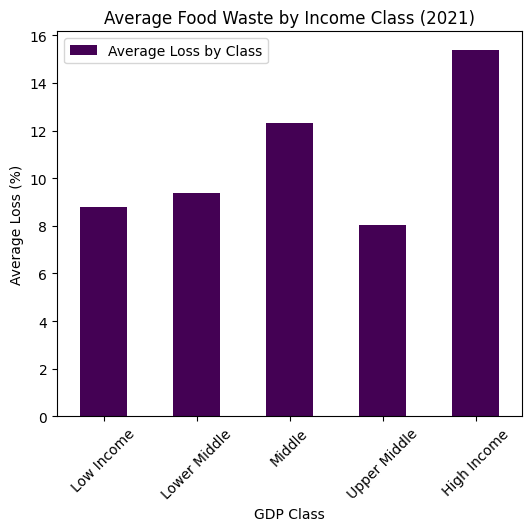

<Figure size 640x480 with 0 Axes>

In [27]:
# # create a bar graph for average loss by income class
average_loss_df.plot(kind = "bar", colormap = 'viridis', figsize = (6, 5), ylabel = "Average Loss (%)", title = "Average Food Waste by Income Class (2021)")
plt.xticks(rotation=45)

# Save the figure
plt.savefig("Visualizations/loss_by_class_all_years.png")

plt.show()
plt.tight_layout()

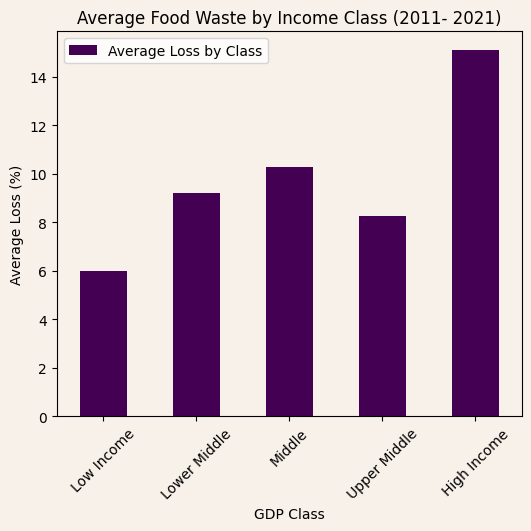

<Figure size 640x480 with 0 Axes>

In [28]:
# create a bar graph for average loss by income class

# Define a color palette
# color_palette = plt.cm.get_cmap('viridis', len(average_recent_df['GDP_class'].unique()))
# # Create a bar graph for average loss by income class fig, 
# ax = plt.subplots(figsize=(6, 5)) 
# bars = ax.bar(average_recent_df['GDP_class'], average_recent_df['Average_Loss'], color=color_palette.colors)
# # Set labels and title 
# ax.set_ylabel("Average Loss (%)") 
# ax.set_title("Average Food Waste by Income Class (2011- 2021)")
# Rotate x-axis labels 
# Show the plot plt.show() plt.tight_layout()
average_recent_df.plot(kind = "bar", colormap = 'viridis', figsize = (6, 5), xlabel = "GDP Class", ylabel = "Average Loss (%)", title = "Average Food Waste by Income Class (2011- 2021)")
plt.xticks(rotation=45)

# Change the background color
plt.gca().set_facecolor('#F8F1E9')  # Set the background color of the plot area
plt.gcf().set_facecolor('#F8F1E9')  # Set the background color of the fig

# Save the figure
plt.savefig("Visualizations/loss_by_class_2011-2021.png")

plt.show()
plt.tight_layout()

In [29]:
# merge full food loss dataframe with 2021 gdp data
clean_with_gdp = pd.merge(food_loss_clean, average_with_gdp, on="country")
clean_with_gdp.sort_values("2021", ascending = False)

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss,average_loss,2021,GDP Class
19114,756,Switzerland,NaN,Potatoes,2015,0.00300,0.003,NaN,NaN,NaN,Wholesale,NaN,NaN,14.615385,93446.43445,High Income
19115,756,Switzerland,NaN,Potatoes,2015,0.00800,0.008,NaN,NaN,NaN,Processing,NaN,NaN,14.615385,93446.43445,High Income
19116,756,Switzerland,NaN,Potatoes,2015,0.04500,0.045,NaN,NaN,NaN,Farm,NaN,NaN,14.615385,93446.43445,High Income
14162,578,Norway,NaN,"Onions and shallots, green",2013,13.25000,6.5% - 20%,NaN,Storage,NaN,Storage,NaN,NaN,35.000000,93072.89251,High Income
14150,578,Norway,NaN,"Peas, green",2017,2.00000,2%,NaN,NaN,NaN,Harvest,Better pesticides against aphids.,Not harvested 1% Lost during harvesting 2% L...,35.000000,93072.89251,High Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18617,728,South Sudan,NaN,Maize (corn),2000,5.91193,5.91193,NaN,Drying,Harvesting,Harvest,NaN,NaN,7.595833,NaN,NaN
18618,728,South Sudan,NaN,Maize (corn),2000,3.71761,3.71761,NaN,Storage,NaN,Farm,NaN,NaN,7.595833,NaN,NaN
18619,728,South Sudan,NaN,Maize (corn),2000,3.90167,3.90167,NaN,Drying,NaN,Farm,NaN,NaN,7.595833,NaN,NaN
18620,728,South Sudan,NaN,Maize (corn),2000,1.48148,1.48148,NaN,Transportation,NaN,Transport,NaN,NaN,7.595833,NaN,NaN


In [30]:
# rename/ re-characterize some rows

clean_with_gdp.loc[clean_with_gdp["activity1"] == "Storage", "food_supply_stage"] = "Storage"
clean_with_gdp.loc[clean_with_gdp["activity1"] == "Transportation", "food_supply_stage"] = "Transportation"
clean_with_gdp.loc[clean_with_gdp["activity1"] == "Shelling", "food_supply_stage"] = "Harvest"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Transport", "food_supply_stage"] = "Transportation"
clean_with_gdp.loc[clean_with_gdp["activity1"] == "Drying", "food_supply_stage"] = "Farm"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Collector", "food_supply_stage"] = "Harvest"

In [31]:
new_blank_rows = clean_with_gdp[clean_with_gdp['food_supply_stage'].isnull() | (clean_with_gdp['food_supply_stage'] == '') & (clean_with_gdp['activity1'].isnull())]
new_blank_rows.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss,average_loss,2021,GDP Class
1716,156,China,NaN,Rice,1997,14.0,5.0-23,NaN,NaN,NaN,NaN,NaN,Excluding Processing Losses,12.346341,12617.505100,Middle
2451,204,Benin,NaN,Maize (corn),2000,17.8,2.1-33.5,NaN,NaN,NaN,NaN,NaN,NaN,2.719588,1360.911474,Lower Middle
2539,214,Dominican Republic,NaN,Tomatoes,1977,14.8,14.8,NaN,NaN,NaN,NaN,NaN,NaN,11.754000,8476.749639,Middle
2540,214,Dominican Republic,NaN,Potatoes,1977,14.2,14.2,NaN,NaN,NaN,NaN,NaN,NaN,11.754000,8476.749639,Middle
2554,218,Ecuador,NaN,Maize (corn),2013,20.0,10.0-30,NaN,NaN,NaN,NaN,NaN,NaN,15.169130,6036.447274,Middle


In [32]:
clean_with_gdp = clean_with_gdp.drop(new_blank_rows.index)


In [33]:
# create a new column to add simplified supply stages
# farm stage: farm, pre-harvest, harvest, post-harvest
# storage stage: storage, packing, stacking
# transport stage: transportation, distribution
# export stage: export, trader
# wholesale stage: wholesale, market, processing
# retail stage: retail, food services
# household stage: households
# whole supply chain is its own category
clean_with_gdp["Simplified Supply Stage"] = ''
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Farm", "Simplified Supply Stage"] = "Farm Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Pre-harvest", "Simplified Supply Stage"] = "Farm Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Harvest", "Simplified Supply Stage"] = "Farm Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Post-harvest", "Simplified Supply Stage"] = "Farm Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Storage", "Simplified Supply Stage"] = "Storage Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Packing", "Simplified Supply Stage"] = "Storage Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Stacking", "Simplified Supply Stage"] = "Storage Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Transportation", "Simplified Supply Stage"] = "Transport Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Distribution", "Simplified Supply Stage"] = "Transport Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Export", "Simplified Supply Stage"] = "Export Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Trader", "Simplified Supply Stage"] = "Export Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Wholesale", "Simplified Supply Stage"] = "Wholesale Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Market", "Simplified Supply Stage"] = "Wholesale Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Processing", "Simplified Supply Stage"] = "Wholesale Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Retail", "Simplified Supply Stage"] = "Retail Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Food Services", "Simplified Supply Stage"] = "Retail Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Households", "Simplified Supply Stage"] = "Household Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Whole supply chain", "Simplified Supply Stage"] = "Whole Supply Chain"
clean_with_gdp.head()
clean_with_gdp.groupby("GDP Class")["country"].nunique()

/var/folders/tn/g6qz3f296z7cn5d90mgpvj600000gn/T/ipykernel_66965/946203527.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_with_gdp.groupby("GDP Class")["country"].nunique()


GDP Class
Low Income      18
Lower Middle    38
Middle          22
Upper Middle    10
High Income      7
Name: country, dtype: int64

In [34]:
# low income countries -- loss per supply stage
low_income_data2 = clean_with_gdp[clean_with_gdp["GDP Class"] == "Low Income"]
low_loss_per_year = low_income_data2.groupby("year")["loss_percentage"].mean()
low_income_data2 = low_income_data2[low_income_data2['year'] >= 2011]
low_loss_per_stage = low_income_data2.groupby("Simplified Supply Stage")["loss_percentage"].mean()
low_loss_per_stage

Simplified Supply Stage
Export Stage           0.590000
Farm Stage             3.716892
Household Stage        3.750000
Retail Stage           8.755000
Storage Stage          2.761619
Transport Stage        1.821224
Whole Supply Chain    23.033333
Wholesale Stage        6.403158
Name: loss_percentage, dtype: float64

In [35]:
# low middle income countries -- loss per supply stage
low_middle_income_data2 = clean_with_gdp[clean_with_gdp["GDP Class"] == "Lower Middle"]
low_middle_loss_per_year = low_middle_income_data2.groupby("year")["loss_percentage"].mean()
low_middle_income_data2 = low_middle_income_data2[low_middle_income_data2['year'] >= 2011]
low_middle_loss_per_stage = low_income_data2.groupby("Simplified Supply Stage")["loss_percentage"].mean()
low_middle_loss_per_stage

Simplified Supply Stage
Export Stage           0.590000
Farm Stage             3.716892
Household Stage        3.750000
Retail Stage           8.755000
Storage Stage          2.761619
Transport Stage        1.821224
Whole Supply Chain    23.033333
Wholesale Stage        6.403158
Name: loss_percentage, dtype: float64

In [36]:
# middle income countries -- loss per supply stage
middle_income_data2 = clean_with_gdp[clean_with_gdp["GDP Class"] == "Middle"]
middle_loss_per_year = middle_income_data2.groupby("year")["loss_percentage"].mean()
middle_income_data2 = middle_income_data2[middle_income_data2['year'] >= 2011]
middle_loss_per_stage = middle_income_data2.groupby("Simplified Supply Stage")["loss_percentage"].mean()
middle_loss_per_stage

Simplified Supply Stage
Export Stage           1.166375
Farm Stage             5.174900
Household Stage       11.266667
Retail Stage           4.250000
Storage Stage          2.964392
Transport Stage        1.582060
Whole Supply Chain    10.134078
Wholesale Stage        6.185238
Name: loss_percentage, dtype: float64

In [37]:
# upper middle income countries -- loss per supply stage
upper_middle_income_data2 = clean_with_gdp[clean_with_gdp["GDP Class"] == "Upper Middle"]
upper_middle_loss_per_year = upper_middle_income_data2.groupby("year")["loss_percentage"].mean()
upper_middle_income_data2 = upper_middle_income_data2[upper_middle_income_data2['year'] >= 2011]
upper_middle_loss_per_stage = upper_middle_income_data2.groupby("Simplified Supply Stage")["loss_percentage"].mean()
upper_middle_loss_per_stage

Simplified Supply Stage
Farm Stage            14.675000
Retail Stage          12.000000
Storage Stage          2.550000
Transport Stage       14.875000
Whole Supply Chain    19.805882
Wholesale Stage        6.166667
Name: loss_percentage, dtype: float64

In [38]:
# high income countries -- loss per supply stage
high_income_data2 = clean_with_gdp[clean_with_gdp["GDP Class"] == "High Income"]
high_loss_per_year = high_income_data2.groupby("year")["loss_percentage"].mean()
high_income_data2 = high_income_data2[high_income_data2['year'] >= 2011]
high_loss_per_stage = high_income_data2.groupby("Simplified Supply Stage")["loss_percentage"].mean()
high_loss_per_stage

Simplified Supply Stage
Farm Stage            11.005659
Household Stage       23.400000
Retail Stage           4.075000
Storage Stage         11.264286
Transport Stage        9.000000
Whole Supply Chain    14.131746
Wholesale Stage       12.987621
Name: loss_percentage, dtype: float64

In [39]:
# dataframe for waste by class by supply stage
loss_per_stage_df = pd.DataFrame({"Low Income": low_loss_per_stage, "Lower Middle Income": low_middle_loss_per_stage, 
                                  "Middle Income": middle_loss_per_stage, "Upper Middle Income": upper_middle_loss_per_stage,
                                  "High Income": high_loss_per_stage})
loss_per_stage_df.fillna(0, inplace=True)
loss_per_stage_df = loss_per_stage_df.T

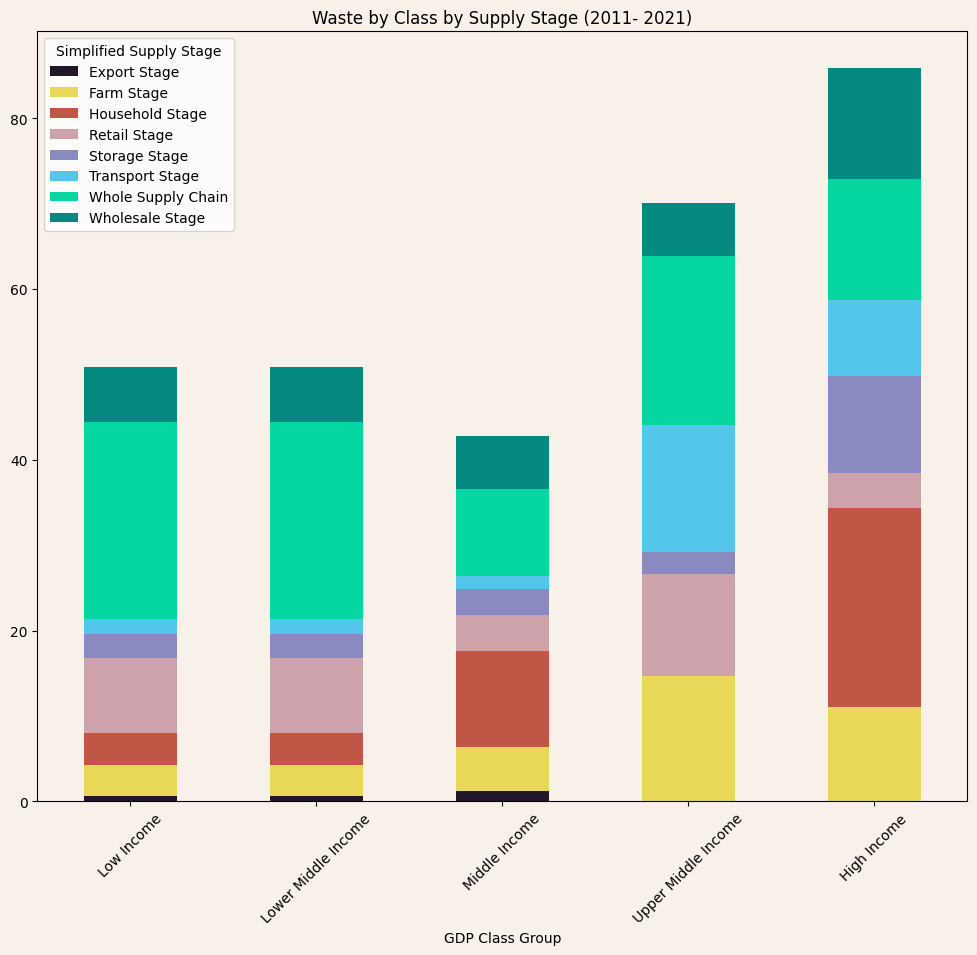

In [40]:
# Define your custom color palette
custom_colors = ['#22162B', '#E9D758', '#C05746', '#CDA2AB', '#8A89C0', '#54C6EB', '#06D6A0', '#048A81']
# Assuming loss_per_stage_df is your DataFrame
ax = loss_per_stage_df.plot(kind='bar', stacked=True, figsize=(12, 10), color=custom_colors)
plt.title('Waste by Class by Supply Stage (2011- 2021)')
plt.xticks(rotation=45)
plt.xlabel("GDP Class Group")

# Change the background color
plt.gca().set_facecolor('#F8F1E9')  # Set the background color of the plot area
plt.gcf().set_facecolor('#F8F1E9')  # Set the background color of the fig

# Save the figure
plt.savefig("Visualizations/waste_by_class_stage_2011-21.png")
plt.show()

In [41]:
low_loss_per_year = pd.DataFrame(low_loss_per_year)
low_loss_per_year.reset_index(inplace = True)
low_loss_per_year = low_loss_per_year[low_loss_per_year['year'] >= 1990]

In [42]:
low_middle_loss_per_year = pd.DataFrame(low_middle_loss_per_year)
low_middle_loss_per_year.reset_index(inplace = True)
low_middle_loss_per_year = low_middle_loss_per_year[low_middle_loss_per_year['year'] >= 1990]

In [43]:
middle_loss_per_year = pd.DataFrame(middle_loss_per_year)
middle_loss_per_year.reset_index(inplace = True)
middle_loss_per_year = middle_loss_per_year[middle_loss_per_year['year'] >= 1990]

In [44]:
upper_middle_loss_per_year = pd.DataFrame(upper_middle_loss_per_year)
upper_middle_loss_per_year.reset_index(inplace = True)
upper_middle_loss_per_year = upper_middle_loss_per_year[upper_middle_loss_per_year['year'] >= 1990]

In [45]:
high_loss_per_year = pd.DataFrame(high_loss_per_year)
high_loss_per_year.reset_index(inplace = True)
high_loss_per_year = high_loss_per_year[high_loss_per_year['year'] >= 1990]

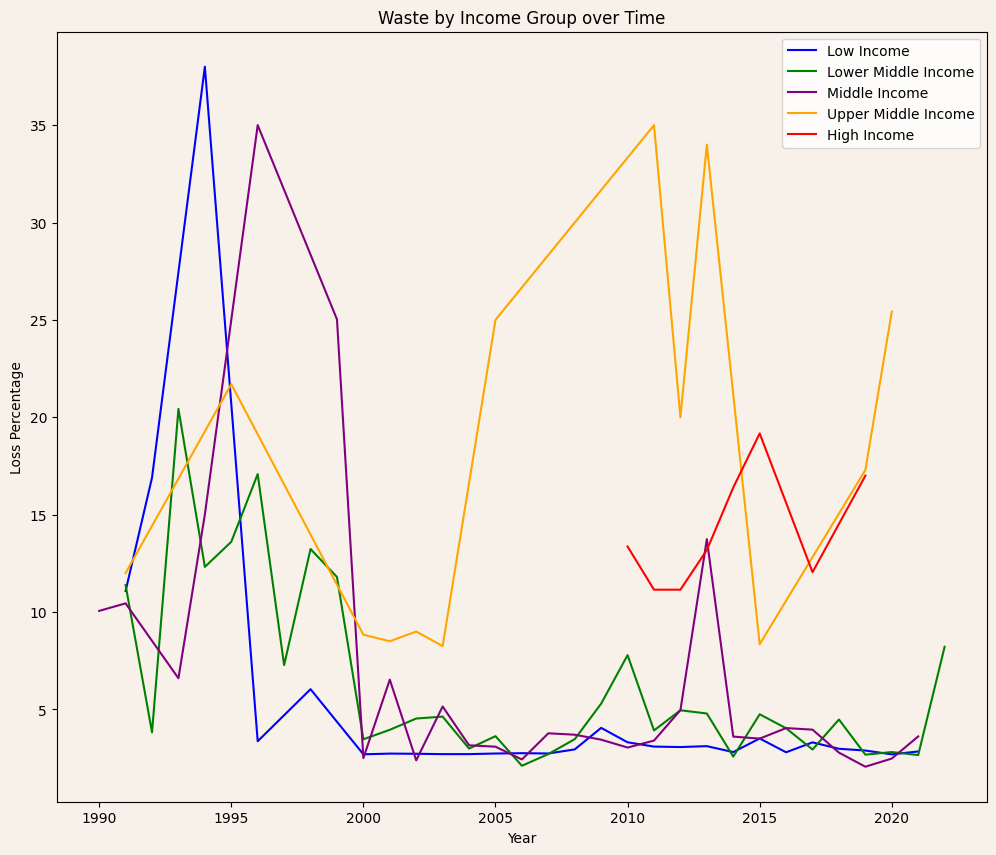

In [46]:
#line graph for waste by income level by year
plt.figure(figsize=(12, 10))
# Plot our line that will be used to track the first country's traveling companion percentage over the years
plt.plot(low_loss_per_year["year"], low_loss_per_year["loss_percentage"], color="blue", label="Low Income")
plt.plot(low_middle_loss_per_year["year"], low_middle_loss_per_year["loss_percentage"], color="green", label="Lower Middle Income")
plt.plot(middle_loss_per_year["year"], middle_loss_per_year["loss_percentage"], color="purple", label="Middle Income")
plt.plot(upper_middle_loss_per_year["year"], upper_middle_loss_per_year["loss_percentage"], color="orange", label="Upper Middle Income")
plt.plot(high_loss_per_year["year"], high_loss_per_year["loss_percentage"], color="red", label="High Income")
plt.legend()
plt.ylabel("Loss Percentage")
plt.xlabel("Year")
plt.title("Waste by Income Group over Time")

# Change the background color
plt.gca().set_facecolor('#F8F1E9')  # Set the background color of the plot area
plt.gcf().set_facecolor('#F8F1E9')  # Set the background color of the fig

# Save the figure
plt.savefig("Visualizations/waste_by_class_over_time.png")

# Print our chart to the screen
plt.show()

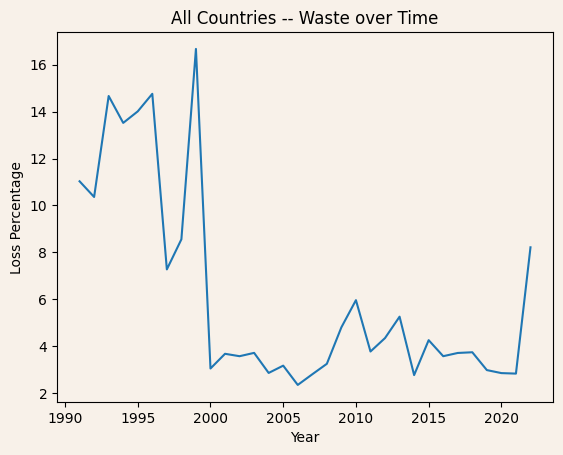

In [47]:
overall_loss_by_year = clean_with_gdp.groupby("year")["loss_percentage"].mean()
overall_loss_by_year = overall_loss_by_year[overall_loss_by_year.index > 1990]
plt.plot(overall_loss_by_year)
plt.title("All Countries -- Waste over Time")
plt.xlabel("Year")
plt.ylabel("Loss Percentage")

# Change the background color
plt.gca().set_facecolor('#F8F1E9')  # Set the background color of the plot area
plt.gcf().set_facecolor('#F8F1E9')  # Set the background color of the fig

# Save the figure
plt.savefig("Visualizations/waste_over_time_overall.png")

plt.show()

In [48]:
top_countries = food_loss_clean.sort_values('loss_percentage', ascending = False)
top_countries

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
10362,410,Republic of Korea,NaN,Strawberries,2001,65.000000,65%,NaN,Transportation,NaN,Transport,Ambient conditions during transportation,NaN
15745,566,Nigeria,NaN,"Cow peas, dry",1974,65.000000,60-70,NaN,NaN,NaN,Storage,NaN,NaN
8639,36,Australia,NaN,Cauliflowers and broccoli,2013,65.000000,65%,NaN,Processing,NaN,Processing,Broccoli,NaN
23863,840,United States of America,NaN,Papayas,2008,64.000000,64%,NaN,Consumption,Retailing,Households,NaN,NaN
22744,834,United Republic of Tanzania,"Chalinze, Lugoba and Kiwangwa","Mangoes, guavas and mangosteens",2013,63.000000,63,NaN,NaN,NaN,Trader,NaN,Rotting
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11130,454,Malawi,NaN,Sorghum,2020,0.002013,0.0020129,NaN,Storage,NaN,Farm,NaN,NaN
11162,454,Malawi,NaN,Sorghum,2019,0.001915,0.00191458,NaN,Storage,NaN,Farm,NaN,NaN
11228,454,Malawi,NaN,Sorghum,2017,0.001857,0.00185738,NaN,Storage,NaN,Farm,NaN,NaN
11090,454,Malawi,NaN,Sorghum,2021,0.001161,0.00116092,NaN,Storage,NaN,Farm,NaN,NaN


In [49]:
GDP_Per_Country_list = gdp_df[["Country Name","Country Code","Indicator Name","Indicator Code",
                                        "2000","2001","2002","2003","2004","2005","2006","2007","2008",
                                        "2009","2010","2011","2012","2013","2014","2015","2016","2017",
                                        "2018","2019","2020","2021"]]
GDP_Per_Country_list = GDP_Per_Country_list.rename(columns={"Country Name":"country"})
GDP_Per_Country_list["Mean GDP"] = 0.0

for i, row in GDP_Per_Country_list.iterrows():
    count = 0
    total = 0
    for year in range(2000, 2021 + 1):  
        value = row[str(year)]
        if pd.notna(value):
            total += value
            count += 1
    if count > 0:
        GDP_Per_Country_list.at[i, "Mean GDP"] = total / count

GDP_Per_Country_list = GDP_Per_Country_list.dropna(how='any')
GDP_Per_Country_list.head()
gdp_av = GDP_Per_Country_list[["country", "Mean GDP"]]
gdp_av.sort_values("Mean GDP", ascending = False)
gdp_av_values = pd.merge(clean_with_gdp, gdp_av, on="country")
gdp_av_values = gdp_av_values.drop(['2021', 'GDP Class'], axis = 1)
gdp_av_values.head()

# re-use our bins from before to designate classes
size_bins = [0, 1000, 5000, 15000, 50000, 150000]
labels = ["Low Income", "Lower Middle", "Middle", "Upper Middle", "High Income"]
gdp_av_values["GDP Class"] = pd.cut(gdp_av_values["Mean GDP"], size_bins, labels=labels, include_lowest = True)
gdp_av_values.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss,average_loss,Simplified Supply Stage,Mean GDP,GDP Class
0,104,Myanmar,NaN,"Rice, milled",2015,1.78,1.78%,26.12kgs,Storage,NaN,Storage,"30 days storage, with trapping",Rodents,30.0,Storage Stage,828.88353,Low Income
1,104,Myanmar,NaN,"Rice, milled",2015,11.77,11.77%,88.18kgs,Storage,NaN,Storage,"60 days storage, no trapping",Rodents,30.0,Storage Stage,828.88353,Low Income
2,104,Myanmar,NaN,"Rice, milled",2015,5.88,5.88%,44.09kgs,Storage,NaN,Storage,"30 days storage, no trapping",Rodents,30.0,Storage Stage,828.88353,Low Income
3,104,Myanmar,NaN,"Rice, milled",2015,3.57,3.57%,52.24kgs,Storage,NaN,Storage,"60 days storage, with trapping",Rodents,30.0,Storage Stage,828.88353,Low Income
4,104,Myanmar,NaN,"Rice, milled",2015,17.65,17.65%,132.27kgs,Storage,NaN,Storage,"90 days storage, no trapping",Rodents,30.0,Storage Stage,828.88353,Low Income


In [50]:
# bins for classes based on AVERAGE GDP
size_bins = [0, 800, 4000, 9000, 35000, 150000]
labels = ["Low Income", "Lower Middle", "Middle", "Upper Middle", "High Income"]
gdp_av_values["GDP Class"] = pd.cut(gdp_av_values["Mean GDP"], 
                                    size_bins, labels=labels, include_lowest = True)
gdp_av_values.head()
gdp_av_values.groupby("GDP Class")["country"].nunique()

/var/folders/tn/g6qz3f296z7cn5d90mgpvj600000gn/T/ipykernel_66965/1254147142.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gdp_av_values.groupby("GDP Class")["country"].nunique()


GDP Class
Low Income      18
Lower Middle    35
Middle          22
Upper Middle    12
High Income      8
Name: country, dtype: int64

In [51]:
# low income countries -- loss per supply stage
low_income_data3 = gdp_av_values[gdp_av_values["GDP Class"] == "Low Income"]
low_loss_per_year1 = gdp_av_values.groupby("year")["loss_percentage"].mean()
low_income_data3 = low_income_data3[low_income_data3['year'] >= 2011]
low_loss_per_stage1 = low_income_data3.groupby("Simplified Supply Stage")["loss_percentage"].mean()
low_loss_per_stage1

Simplified Supply Stage
Export Stage           0.590000
Farm Stage             3.693651
Household Stage        3.750000
Retail Stage          12.046667
Storage Stage          2.770558
Transport Stage        1.831096
Whole Supply Chain    24.742857
Wholesale Stage        5.937407
Name: loss_percentage, dtype: float64

In [52]:
# low middle income countries -- loss per supply stage
low_middle_income_data3 = gdp_av_values[gdp_av_values["GDP Class"] == "Lower Middle"]
low_middle_loss_per_year1 = low_middle_income_data3.groupby("year")["loss_percentage"].mean()
low_middle_income_data3 = low_middle_income_data3[low_middle_income_data3['year'] >= 2011]
low_middle_loss_per_stage1 = low_middle_income_data3.groupby("Simplified Supply Stage")["loss_percentage"].mean()
low_middle_loss_per_stage1

Simplified Supply Stage
Export Stage           9.589667
Farm Stage             4.063992
Household Stage        7.788636
Retail Stage          13.000847
Storage Stage          3.357155
Transport Stage        1.993753
Whole Supply Chain     7.779175
Wholesale Stage        5.953774
Name: loss_percentage, dtype: float64

In [53]:
# middle income countries -- loss per supply stage
middle_income_data3 = gdp_av_values[gdp_av_values["GDP Class"] == "Middle"]
middle_loss_per_year1 = middle_income_data3.groupby("year")["loss_percentage"].mean()
middle_income_data3 = middle_income_data3[middle_income_data3['year'] >= 2011]
middle_loss_per_stage1 = middle_income_data3.groupby("Simplified Supply Stage")["loss_percentage"].mean()
middle_loss_per_stage1

Simplified Supply Stage
Export Stage           1.700250
Farm Stage             4.296982
Household Stage       10.275000
Retail Stage           4.250000
Storage Stage          2.717421
Transport Stage        1.566119
Whole Supply Chain     4.033506
Wholesale Stage        6.115000
Name: loss_percentage, dtype: float64

In [54]:
# upper middle income countries -- loss per supply stage
upper_middle_income_data3 = gdp_av_values[gdp_av_values["GDP Class"] == "Upper Middle"]
upper_middle_loss_per_year1 = upper_middle_income_data3.groupby("year")["loss_percentage"].mean()
upper_middle_income_data3 = upper_middle_income_data3[upper_middle_income_data3['year'] >= 2011]
upper_middle_loss_per_stage1 = upper_middle_income_data3.groupby("Simplified Supply Stage")["loss_percentage"].mean()
upper_middle_loss_per_stage1

Simplified Supply Stage
Farm Stage            15.767857
Retail Stage          12.000000
Storage Stage          1.343529
Transport Stage       55.000000
Whole Supply Chain    21.458446
Wholesale Stage        8.450000
Name: loss_percentage, dtype: float64

In [55]:
# high income countries -- loss per supply stage
high_income_data3 = gdp_av_values[gdp_av_values["GDP Class"] == "High Income"]
high_loss_per_year1 = high_income_data3.groupby("year")["loss_percentage"].mean()
high_income_data3 = high_income_data3[high_income_data3['year'] >= 2011]
high_loss_per_stage1 = high_income_data3.groupby("Simplified Supply Stage")["loss_percentage"].mean()
high_loss_per_stage1

Simplified Supply Stage
Farm Stage            10.792713
Household Stage       23.400000
Retail Stage           4.075000
Storage Stage          8.335000
Transport Stage        3.375000
Whole Supply Chain    14.131746
Wholesale Stage       12.104406
Name: loss_percentage, dtype: float64

In [56]:
# dataframe for waste by class by supply stage
loss_av_stage_df = pd.DataFrame({"Low Income": low_loss_per_stage1, "Lower Middle Income": low_middle_loss_per_stage1, 
                                  "Middle Income": middle_loss_per_stage1, "Upper Middle Income": upper_middle_loss_per_stage1,
                                  "High Income": high_loss_per_stage1})
loss_av_stage_df.fillna(0, inplace=True)
loss_av_stage_df = loss_av_stage_df.T

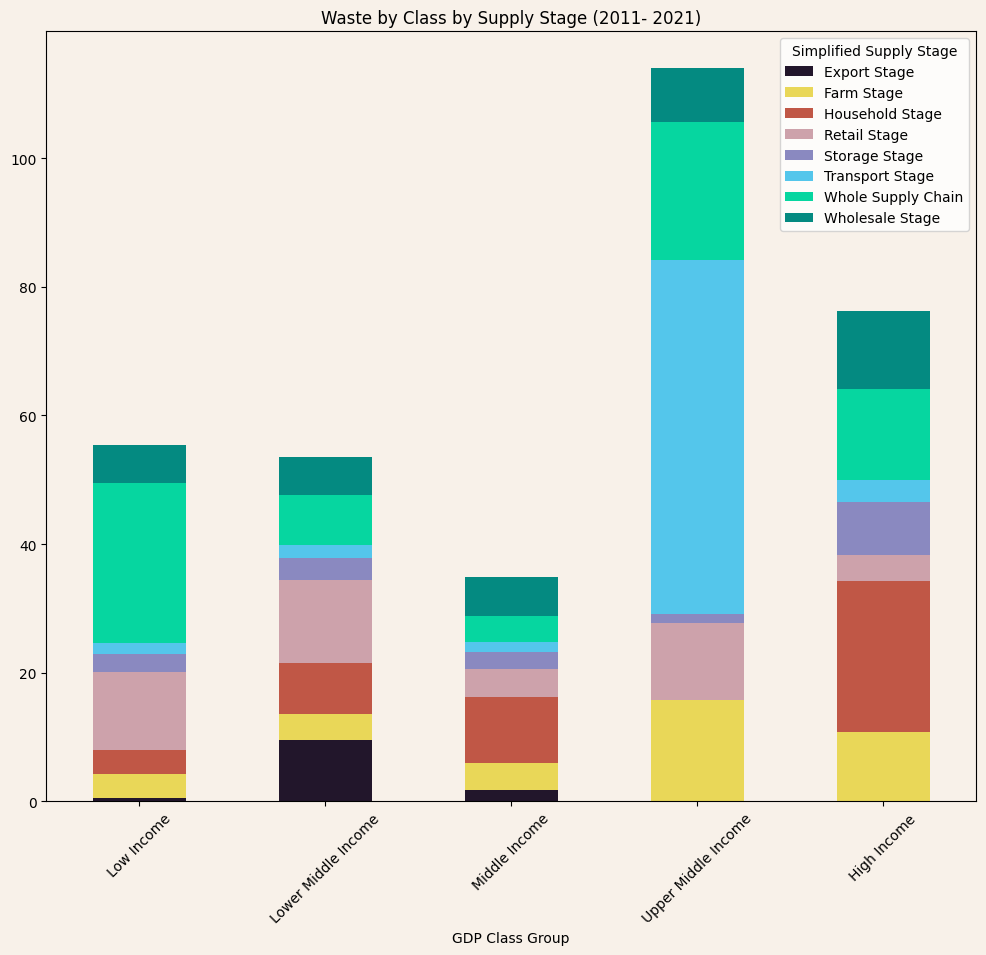

In [57]:
# breakdown by income and supply stage by AVERAGE GDP
# Define your custom color palette
custom_colors = ['#22162B', '#E9D758', '#C05746', '#CDA2AB', '#8A89C0', '#54C6EB', '#06D6A0', '#048A81']
# Assuming loss_per_stage_df is your DataFrame
ax = loss_av_stage_df.plot(kind='bar', stacked=True, figsize=(12, 10), color=custom_colors)
plt.title('Waste by Class by Supply Stage (2011- 2021)')
plt.xticks(rotation=45)
plt.xlabel("GDP Class Group")

# Change the background color
plt.gca().set_facecolor('#F8F1E9')  # Set the background color of the plot area
plt.gcf().set_facecolor('#F8F1E9')  # Set the background color of the fig

# Save the figure
plt.savefig("Visualizations/waste_by_class_stage_average_GDP_2011-21.png")
plt.show()

In [58]:
#create df for scatterplot -- loss percentage by GDP per country
average_loss_per_country = clean_with_gdp.groupby("country")["loss_percentage"].mean()
average_loss_per_country = pd.DataFrame(average_loss_per_country)
loss_and_2021_gdp = pd.merge(average_loss_per_country, gdp_2021, on="country")
loss_and_2021_gdp = loss_and_2021_gdp.dropna()
loss_and_2021_gdp.head()

,country,loss_percentage,2021
0,Algeria,17.500000,4216.251285
1,Angola,2.519641,1927.474078
2,Argentina,1.038571,10650.860460
3,Armenia,11.368421,4972.783204
4,Australia,18.402326,60697.245440


The correlation between both factors is 0.2


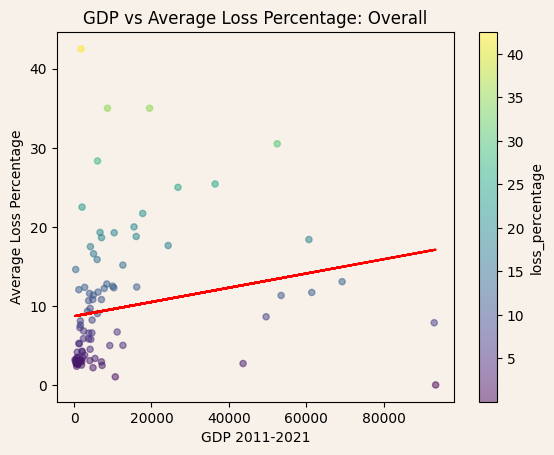

In [59]:
#scatterplots
loss_and_2021_gdp.plot(kind="scatter", x='2021' , 
          y='loss_percentage',
          c='loss_percentage',
          cmap='viridis', alpha=0.5,
          xlabel='GDP 2011-2021',          
          ylabel='Average Loss Percentage',
          title='GDP vs Average Loss Percentage: Overall',)
x_values = loss_and_2021_gdp["2021"] 
y_values = loss_and_2021_gdp["loss_percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, loss_and_2021_gdp["loss_percentage"] )
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.gca().set_facecolor('#F8F1E9')  
plt.gcf().set_facecolor('#F8F1E9')

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(st.pearsonr(x_values,y_values)[0],2)}")

plt.savefig("Visualizations/gdp_vs_loss_overall_scatterplot.png")

In [60]:
# loss percentage per GDP by farm supply stage
only_farm = clean_with_gdp.loc[clean_with_gdp["Simplified Supply Stage"] == "Farm Stage"]
farm_losses = only_farm.groupby("country")["loss_percentage"].mean()
farm_and_2021_gdp = pd.merge(farm_losses, gdp_2021, on="country")
farm_and_2021_gdp = farm_and_2021_gdp.dropna()
farm_and_2021_gdp

,country,loss_percentage,2021
0,Angola,3.385689,1927.474078
1,Armenia,13.416667,4972.783204
2,Australia,13.318182,60697.245440
3,Bangladesh,6.972663,2457.964466
4,Benin,4.864495,1360.911474
...,...,...,...
79,Uganda,3.706838,883.892026
80,Ukraine,15.813235,4827.845703
81,Viet Nam,6.700000,3759.948329
82,Zambia,3.186767,1134.713454


The correlation between both factors is 0.1


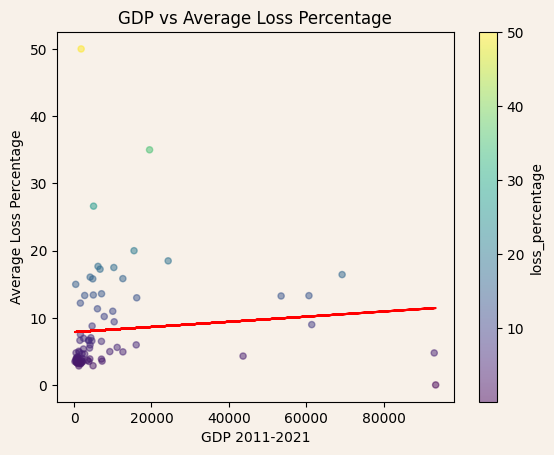

In [61]:
#farm scatterplot
farm_and_2021_gdp.plot(kind="scatter", x='2021' , 
          y='loss_percentage',
          c='loss_percentage',
          cmap='viridis', alpha=0.5,
          xlabel='GDP 2011-2021',          
          ylabel='Average Loss Percentage',
          title='GDP vs Average Loss Percentage',)
x_values = farm_and_2021_gdp["2021"] 
y_values = farm_and_2021_gdp["loss_percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, farm_and_2021_gdp["loss_percentage"] )
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.gca().set_facecolor('#F8F1E9')  
plt.gcf().set_facecolor('#F8F1E9')

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(st.pearsonr(x_values,y_values)[0],2)}")

In [62]:
# loss percentage per GDP by transport supply stage
only_transport = clean_with_gdp.loc[clean_with_gdp["Simplified Supply Stage"] == "Transport Stage"]
transport_losses = only_transport.groupby("country")["loss_percentage"].mean()
transport_and_2021_gdp = pd.merge(transport_losses, gdp_2021, on="country")
transport_and_2021_gdp = transport_and_2021_gdp.dropna()
transport_and_2021_gdp.head()

,country,loss_percentage,2021
0,Angola,1.571790,1927.474078
1,Bangladesh,4.432667,2457.964466
2,Benin,1.802976,1360.911474
3,Botswana,1.679041,7244.158548
4,Burkina Faso,1.642497,888.803611


The correlation between both factors is 0.22


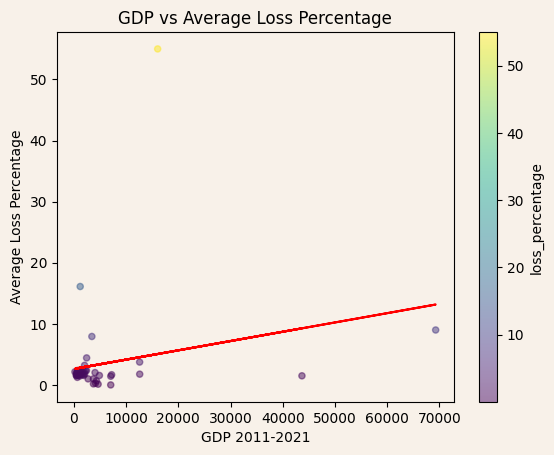

In [63]:
#transport scatterplot
transport_and_2021_gdp.plot(kind="scatter", x='2021' , 
          y='loss_percentage',
          c='loss_percentage',
          cmap='viridis', alpha=0.5,
          xlabel='GDP 2011-2021',          
          ylabel='Average Loss Percentage',
          title='GDP vs Average Loss Percentage',)
x_values = transport_and_2021_gdp["2021"] 
y_values = transport_and_2021_gdp["loss_percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, transport_and_2021_gdp["loss_percentage"] )
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.gca().set_facecolor('#F8F1E9')  
plt.gcf().set_facecolor('#F8F1E9')

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(st.pearsonr(x_values,y_values)[0],2)}")

In [64]:
# loss percentage per GDP by export supply stage
only_export = clean_with_gdp.loc[clean_with_gdp["Simplified Supply Stage"] == "Export Stage"]
export_losses = only_export.groupby("country")["loss_percentage"].mean()
export_and_2021_gdp = pd.merge(export_losses, gdp_2021, on="country")
export_and_2021_gdp.head()

,country,loss_percentage,2021
0,Bangladesh,6.572222,2457.964466
1,Benin,50.000000,1360.911474
2,Cambodia,3.050000,1625.235021
3,China,15.200000,12617.505100
4,Ecuador,0.930500,6036.447274


The correlation between both factors is -0.1


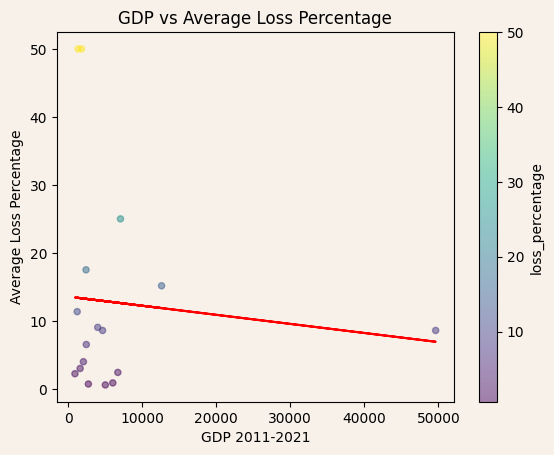

In [65]:
#export scatterplot
export_and_2021_gdp.plot(kind="scatter", x='2021' , 
          y='loss_percentage',
          c='loss_percentage',
          cmap='viridis', alpha=0.5,
          xlabel='GDP 2011-2021',          
          ylabel='Average Loss Percentage',
          title='GDP vs Average Loss Percentage',)
x_values = export_and_2021_gdp["2021"] 
y_values = export_and_2021_gdp["loss_percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, export_and_2021_gdp["loss_percentage"] )
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.gca().set_facecolor('#F8F1E9')  
plt.gcf().set_facecolor('#F8F1E9')

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(st.pearsonr(x_values,y_values)[0],2)}")

In [66]:
# loss percentage per GDP by household supply stage
only_household = clean_with_gdp.loc[clean_with_gdp["Simplified Supply Stage"] == "Household Stage"]
household_losses = only_household.groupby("country")["loss_percentage"].mean()
household_and_2021_gdp = pd.merge(household_losses, gdp_2021, on="country")
household_and_2021_gdp.head()

,country,loss_percentage,2021
0,Armenia,5.250000,4972.783204
1,Australia,25.555556,60697.245440
2,Bangladesh,3.536667,2457.964466
3,China,3.300000,12617.505100
4,Fiji,9.283333,4656.051362


The correlation between both factors is 0.51


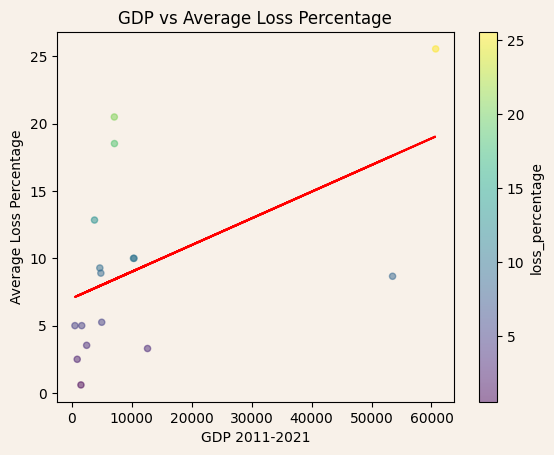

In [67]:
#household scatterplot
household_and_2021_gdp.plot(kind="scatter", x='2021' , 
          y='loss_percentage',
          c='loss_percentage',
          cmap='viridis', alpha=0.5,
          xlabel='GDP 2011-2021',          
          ylabel='Average Loss Percentage',
          title='GDP vs Average Loss Percentage',)
x_values = household_and_2021_gdp["2021"] 
y_values = household_and_2021_gdp["loss_percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, household_and_2021_gdp["loss_percentage"] )
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.gca().set_facecolor('#F8F1E9')  
plt.gcf().set_facecolor('#F8F1E9')

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(st.pearsonr(x_values,y_values)[0],2)}")

plt.savefig("Visualizations/gdp_vs_loss_households_scatterplot.png")

In [68]:
# loss percentage per GDP by storage supply stage
only_storage = clean_with_gdp.loc[clean_with_gdp["Simplified Supply Stage"] == "Storage Stage"]
storage_losses = only_storage.groupby("country")["loss_percentage"].mean()
storage_and_2021_gdp = pd.merge(storage_losses, gdp_2021, on="country")
storage_and_2021_gdp = storage_and_2021_gdp.dropna()
storage_and_2021_gdp

,country,loss_percentage,2021
0,Angola,2.341629,1927.474078
1,Argentina,0.503077,10650.860460
2,Armenia,18.250000,4972.783204
3,Bangladesh,4.850642,2457.964466
4,Belize,28.333333,6060.968223
...,...,...,...
68,Tunisia,6.750000,3817.377174
69,Uganda,3.135948,883.892026
70,Viet Nam,41.250000,3759.948329
71,Zambia,3.094195,1134.713454


The correlation between both factors is 0.11


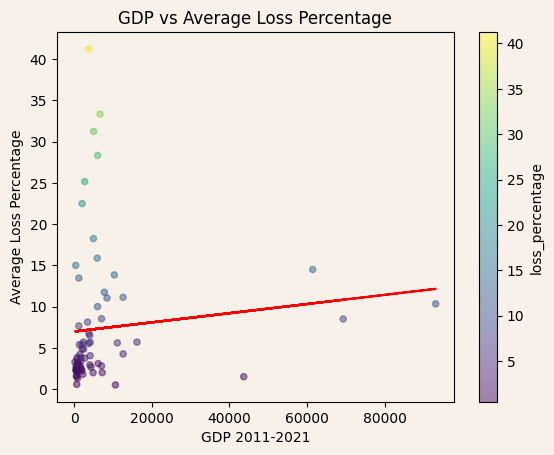

In [69]:
#storage scatterplot
storage_and_2021_gdp.plot(kind="scatter", x='2021' , 
          y='loss_percentage',
          c='loss_percentage',
          cmap='viridis', alpha=0.5,
          xlabel='GDP 2011-2021',          
          ylabel='Average Loss Percentage',
          title='GDP vs Average Loss Percentage',)
x_values = storage_and_2021_gdp["2021"] 
y_values = storage_and_2021_gdp["loss_percentage"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, storage_and_2021_gdp["loss_percentage"] )
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.gca().set_facecolor('#F8F1E9')  
plt.gcf().set_facecolor('#F8F1E9')

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(st.pearsonr(x_values,y_values)[0],2)}")